# SETUP

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.impute import SimpleImputer
import missingno as msno # Our hero ^_^
import plotly.express as px
# import mglearn
import warnings
# warnings.simplefilter(action='ignore')

In [109]:
from sas7bdat import SAS7BDAT
with SAS7BDAT('HCMST_ver_304_SAS.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Overview analysis

In [110]:
df_sas.head()
# df_sas.columns

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
0,22526.0,4265.0,4265.0,52.0,4.0,3.0,12.0,4.0,4.0,2.0,...,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN
1,23286.0,16485.0,16485.0,28.0,2.0,1.0,13.0,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25495.0,52464.0,NaN,49.0,4.0,3.0,9.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26315.0,4575.0,4575.0,31.0,2.0,2.0,11.0,3.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27355.0,12147.0,NaN,35.0,3.0,2.0,9.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df_sas.info()
list(df_sas.select_dtypes(['object']).columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Columns: 387 entries, caseid_new to w3_nonmbtiming_month
dtypes: float64(385), object(2)
memory usage: 11.8+ MB


['pphhcomp11_member15_age', 'marrycountry']

weight2                    993
papglb_friend               10
papevangelical             105
papreligion                 15
pphhcomp11_member2_age    1040
                          ... 
w3_q8                     3865
w3_q9                     3906
w3_q10                    3915
w3_nonmbtiming_year       3915
w3_nonmbtiming_month      3915
Length: 325, dtype: int64


<AxesSubplot: >

/Users/olivier_ld/Desktop/Becode-cloud/Projects/dating_app/NEW_DATING/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/olivier_ld/Desktop/Becode-cloud/Projects/dating_app/NEW_DATING/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


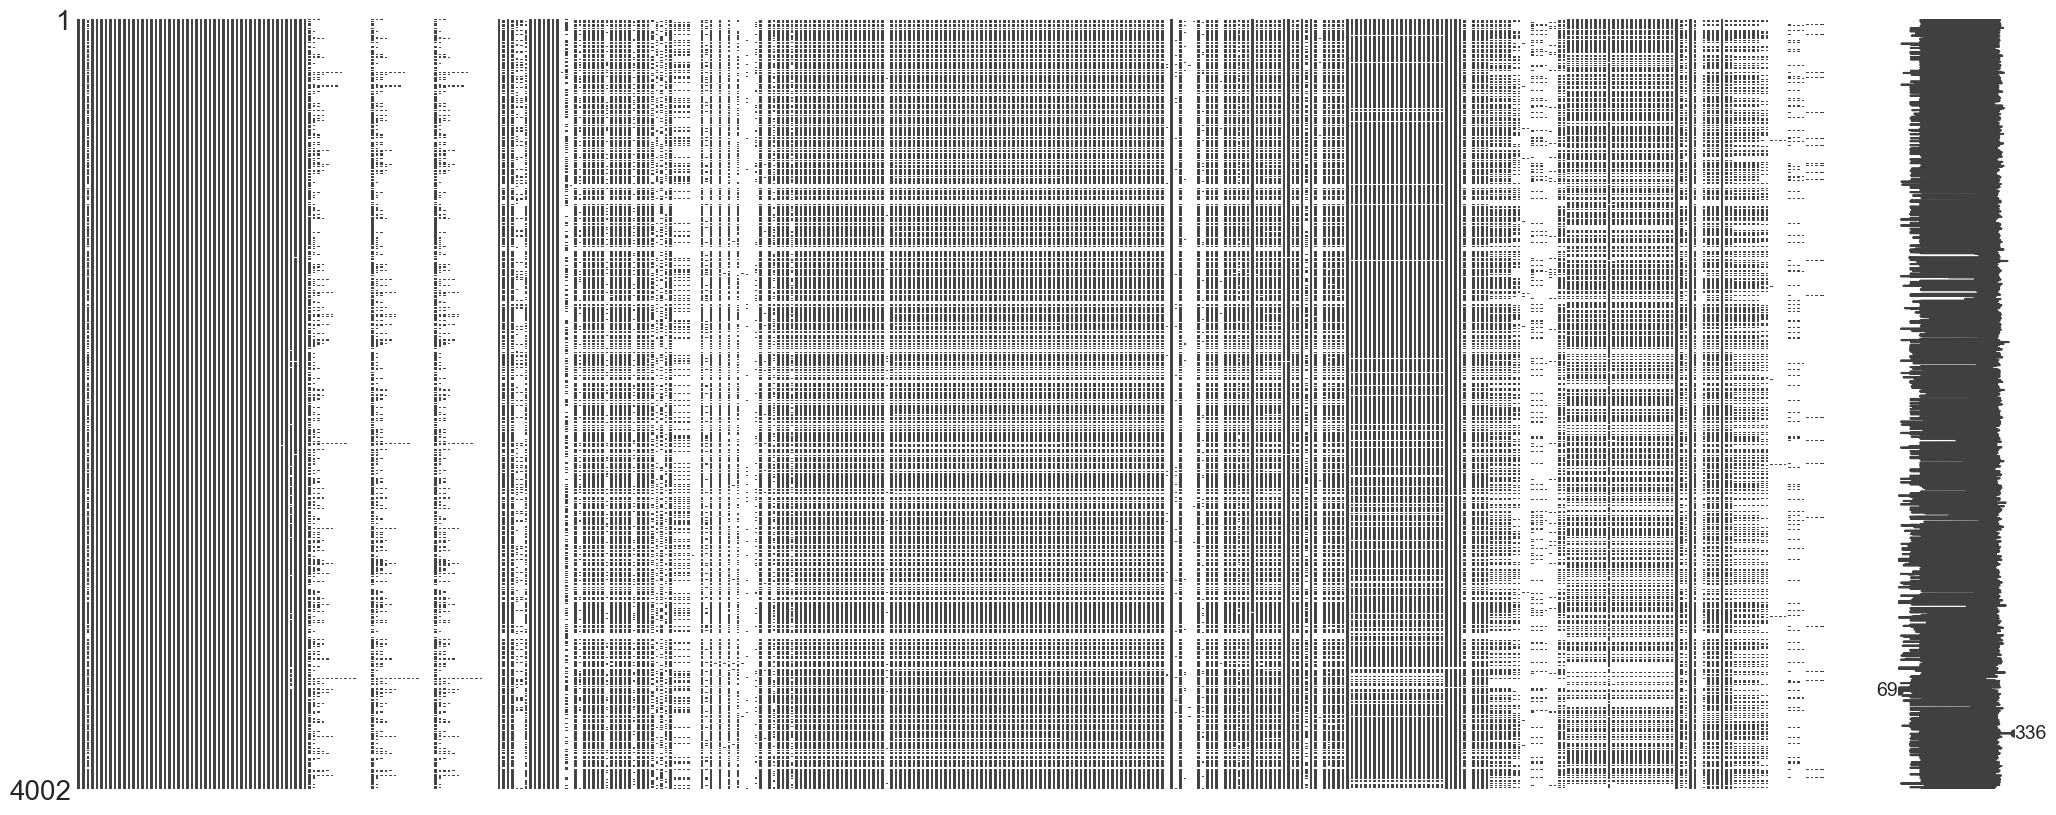

In [112]:
X_train = df_sas

# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
msno.matrix(X_train)

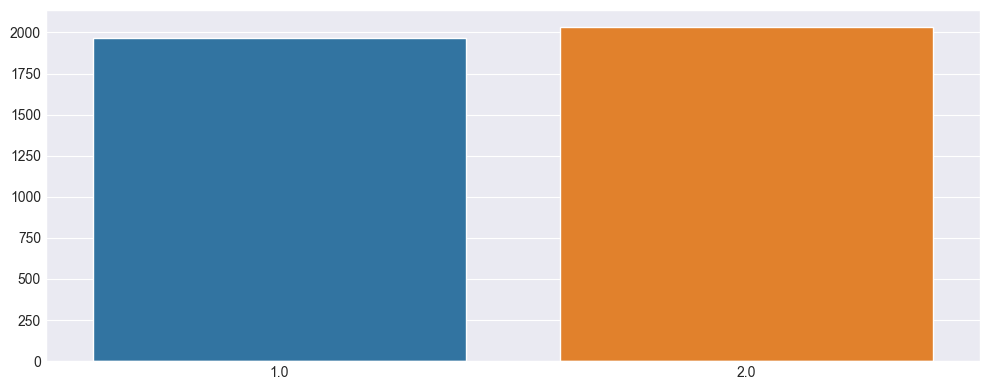

In [113]:
genders = df_sas.ppgender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

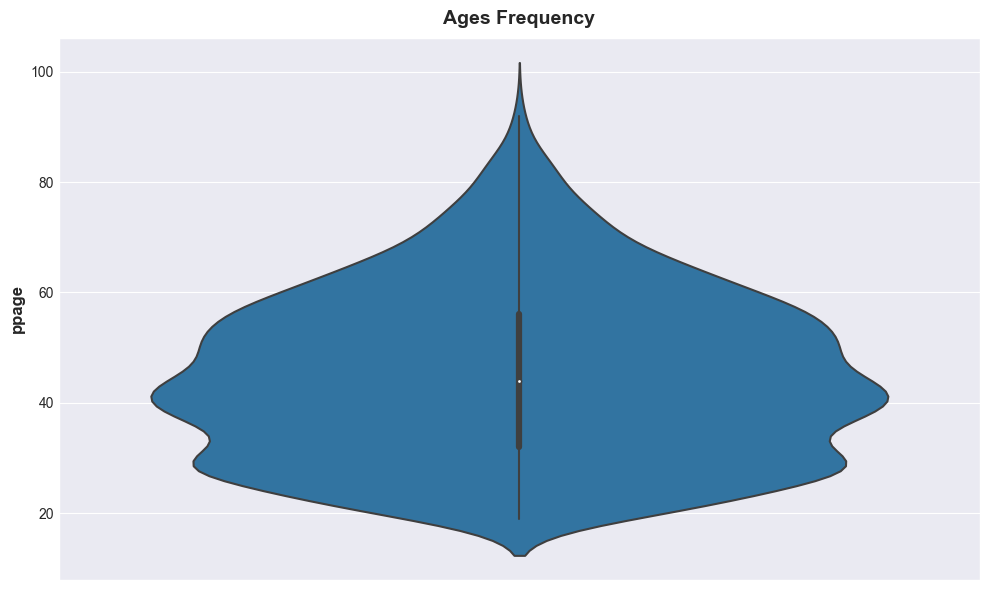

0    52.0
1    28.0
3    31.0
6    53.0
7    58.0
Name: ppage, dtype: float64

In [114]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df_Q1["ppage"])
plt.show()
df_Q1["ppage"].head()

In [115]:
#drop missing values

df_sas = df_sas.replace([' ','NULL'],np.nan)
df_sas = df_sas.dropna(thresh=df_sas.shape[0]*0.6,axis=1)
print(df_sas)

# print(df_sas.isin([' ','NULL', 'NaN']))
# print(df_sas.isin([' ','NULL', 'NaN']).mean())
# df_sas = df_sas.loc[:, df_sas.isin([' ','NULL', 'NaN']).mean() < .6]
# print(df_sas)

      caseid_new  weight1  weight2  ppage  ppagecat  ppagect4  ppeduc  \
0        22526.0   4265.0   4265.0   52.0       4.0       3.0    12.0   
1        23286.0  16485.0  16485.0   28.0       2.0       1.0    13.0   
2        25495.0  52464.0      NaN   49.0       4.0       3.0     9.0   
3        26315.0   4575.0   4575.0   31.0       2.0       2.0    11.0   
4        27355.0  12147.0      NaN   35.0       3.0       2.0     9.0   
...          ...      ...      ...    ...       ...       ...     ...   
3997   4623505.0  50561.0      NaN   50.0       4.0       3.0    13.0   
3998   4625902.0  23386.0      NaN   90.0       7.0       4.0     4.0   
3999   4626536.0   2121.0   2121.0   53.0       4.0       3.0    11.0   
4000   4627251.0  41771.0  41771.0   25.0       2.0       1.0    11.0   
4001   4628251.0  46353.0  46353.0   25.0       2.0       1.0    12.0   

      ppeducat  ppethm  ppgender  ...  pp3_newer  w2w3_combo_breakup  \
0          4.0     4.0       2.0  ...        1.0   

In [116]:
# plt.figure(figsize=(12,9))
# sns.heatmap(df_sas.corr(),annot=True,cmap='RdBu')
# plt.title('Correlation Heatmap',fontsize=14)
# plt.yticks(rotation =0)
# plt.show()

# Question : does the salary age on the quality of relationship

In [117]:
df_Q1 = df_sas.copy()

In [118]:
features_Q1 = ["relationship_quality", "pp3_ppeducat", "ppage", "ppgender"]
df_Q1 = df_Q1[features_Q1]
df_Q1.head()


,relationship_quality,pp3_ppeducat,ppage,ppgender
0,4.0,4.0,52.0,2.0
1,4.0,4.0,28.0,2.0
2,NaN,2.0,49.0,2.0
3,4.0,3.0,31.0,1.0
4,NaN,2.0,35.0,1.0


In [119]:
# Number of missing values in each column of training data


missing_val_count_by_column = (df_Q1.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
df_Q1 = df_Q1.dropna()

relationship_quality    1006
pp3_ppeducat            1358
dtype: int64


In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_98645/2013380433.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [121]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
df_Q1["Cluster"] = kmeans.fit_predict(df_Q1)
df_Q1["Cluster"] = df_Q1["Cluster"].astype("category")

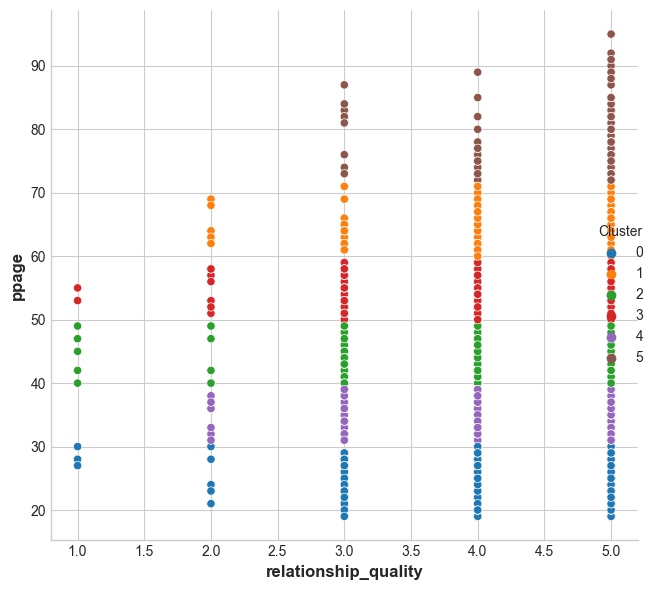

In [122]:
sns.relplot(
    x="relationship_quality", y="ppage", hue="Cluster", data=df_Q1, height=6,
);

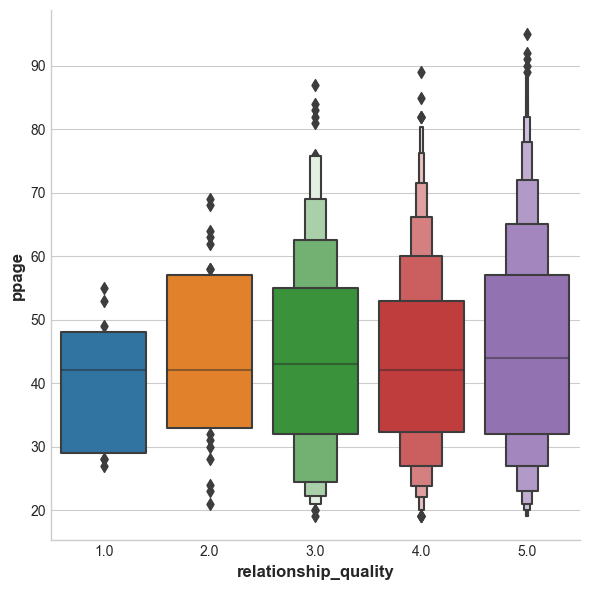

In [123]:
sns.catplot(x="relationship_quality", y="ppage", data=df_Q1, kind="boxen", height=6)

# Question 2 : what is the profile of people using app

<class 'pandas.core.series.Series'>
RangeIndex: 4002 entries, 0 to 4001
Series name: q31_4
Non-Null Count  Dtype  
--------------  -----  
3009 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB
None


array([[<AxesSubplot: title={'center': 'q31_4'}>]], dtype=object)

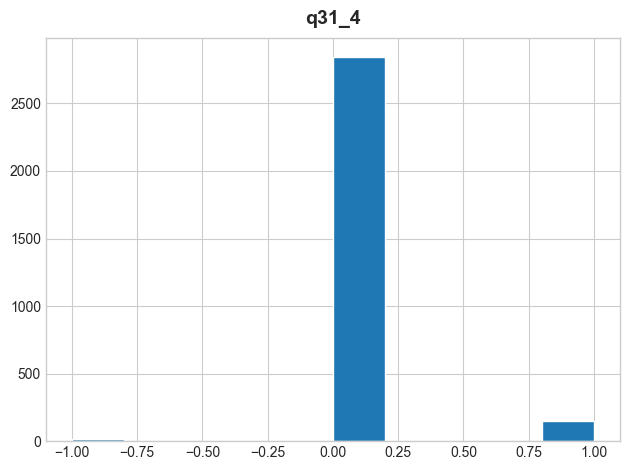

In [124]:
#Check correlation map between those using or not an app and do clustering for the most important ones.

df_Q2 = df_sas.copy()
Features_Q2 = ["q31_4"]
print(df_Q2["q31_4"].info())
df_Q2.hist(column='q31_4')

In [125]:
df_Q2 = df_Q2[df_Q2["q31_4"]==1]
df_Q2.describe()

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,pp3_newer,w2w3_combo_breakup,w3_xpartnered,w3_xdeceased,w3_xlast,w3_xyear,w3_xmonth,w3_xqualified,w3_status,w3_complete
count,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,131.000000,150.000000,150.0,125.00000,125.00000,125.000000,150.000000,125.000000,125.00000
mean,2.055672e+06,37637.373333,37637.373333,41.466667,3.173333,2.246667,11.060000,3.300000,1.713333,1.473333,...,0.746667,0.305344,1.166667,0.0,1.21600,2009.78400,2.944000,0.833333,1.472000,0.75200
std,1.400717e+06,40128.625104,40128.625104,11.738005,1.185747,0.834947,1.659749,0.880436,1.265636,0.500961,...,0.436377,0.462321,0.373927,0.0,0.41317,0.41317,0.528296,0.373927,0.798951,0.43359
min,2.252600e+04,1005.000000,1005.000000,20.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.0,1.00000,2009.00000,2.000000,0.000000,1.000000,0.00000
25%,7.009430e+05,4090.000000,4090.000000,32.000000,2.000000,2.000000,10.000000,3.000000,1.000000,1.000000,...,0.250000,0.000000,1.000000,0.0,1.00000,2010.00000,3.000000,1.000000,1.000000,1.00000
50%,1.888351e+06,31413.000000,31413.000000,42.000000,3.000000,2.000000,12.000000,4.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.0,1.00000,2010.00000,3.000000,1.000000,1.000000,1.00000
75%,3.185230e+06,58223.250000,58223.250000,49.000000,4.000000,3.000000,12.000000,4.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,0.0,1.00000,2010.00000,3.000000,1.000000,2.000000,1.00000
max,4.621371e+06,264379.000000,264379.000000,89.000000,7.000000,4.000000,14.000000,4.000000,5.000000,2.000000,...,1.000000,1.000000,2.000000,0.0,2.00000,2010.00000,5.000000,1.000000,4.000000,1.00000


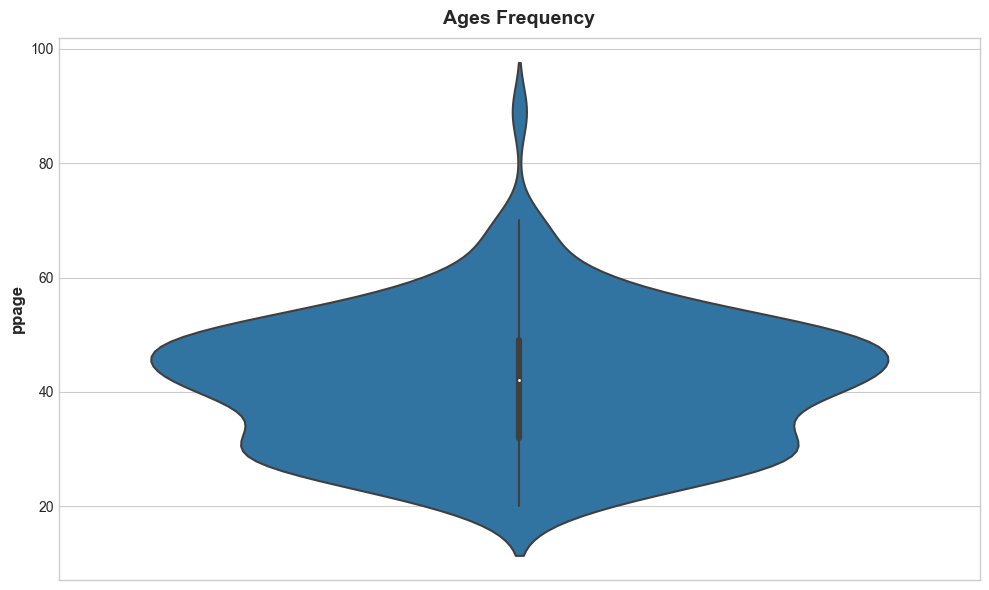

In [126]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df_Q2["ppage"])
plt.show()

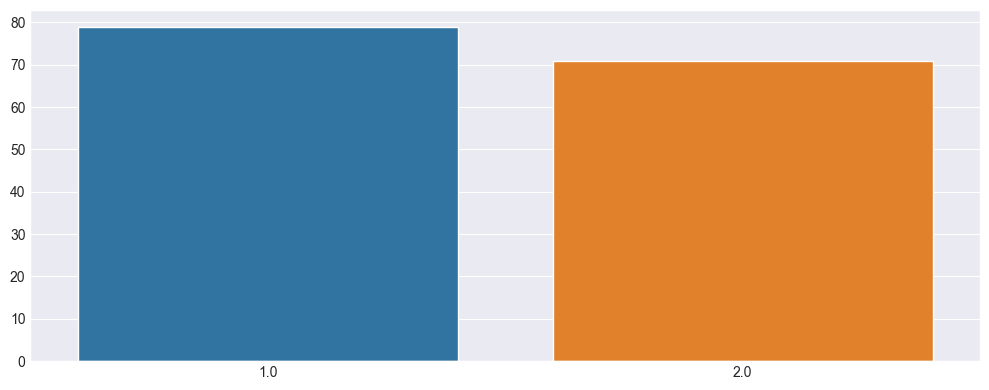

In [127]:
genders = df_Q2.ppgender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [128]:
#By curiosity check what is the most frequent way of meeting partners & who introduced? q24
#clustering age and way of meeting new partner (do reverse encoding?)

#did you date in the last 6months? i.e : single become a normal status.

#Do clustering with age and sex 

#without filters on people using app --> understand affinities



# Clustering Exploration

In [129]:
df_sas.head()

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,pp3_newer,w2w3_combo_breakup,w3_xpartnered,w3_xdeceased,w3_xlast,w3_xyear,w3_xmonth,w3_xqualified,w3_status,w3_complete
0,22526.0,4265.0,4265.0,52.0,4.0,3.0,12.0,4.0,4.0,2.0,...,1.0,0.0,1.0,0.0,1.0,2010.0,3.0,1.0,1.0,1.0
1,23286.0,16485.0,16485.0,28.0,2.0,1.0,13.0,4.0,1.0,2.0,...,1.0,0.0,1.0,0.0,1.0,2010.0,3.0,1.0,1.0,1.0
2,25495.0,52464.0,NaN,49.0,4.0,3.0,9.0,2.0,2.0,2.0,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,26315.0,4575.0,4575.0,31.0,2.0,2.0,11.0,3.0,1.0,1.0,...,1.0,1.0,2.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
4,27355.0,12147.0,NaN,35.0,3.0,2.0,9.0,2.0,1.0,1.0,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [141]:
df_Q3 = df_sas[['caseid_new', 'ppage','ppincimp','q24_met_online','ppeduc']]
# df_Q3.head()
df_Q3 = df_Q3.dropna()
df_Q3 = df_Q3.set_index(['caseid_new'])
df_Q3.head()

,ppage,ppincimp,q24_met_online,ppeduc
caseid_new,,,,
22526.0,52.0,7.0,1.0,12.0
23286.0,28.0,11.0,0.0,13.0
26315.0,31.0,11.0,1.0,11.0
28536.0,53.0,17.0,0.0,12.0
29584.0,58.0,6.0,0.0,13.0


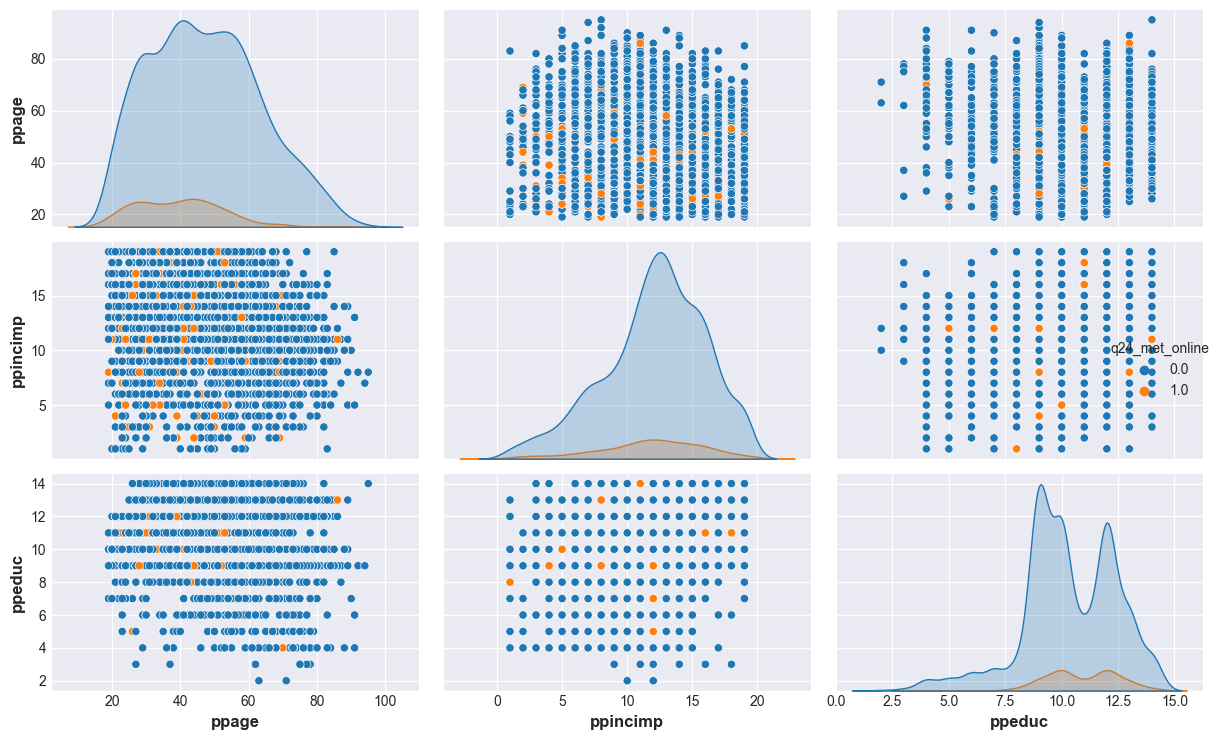

In [142]:
sns.pairplot(df_Q3, hue='q24_met_online',aspect = 1.5)
plt.show()

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,pp3_newer,w2w3_combo_breakup,w3_xpartnered,w3_xdeceased,w3_xlast,w3_xyear,w3_xmonth,w3_xqualified,w3_status,w3_complete
0,22526.0,4265.0,4265.0,52.0,4.0,3.0,12.0,4.0,4.0,2.0,...,1.0,0.0,1.0,0.0,1.0,2010.0,3.0,1.0,1.0,1.0
1,23286.0,16485.0,16485.0,28.0,2.0,1.0,13.0,4.0,1.0,2.0,...,1.0,0.0,1.0,0.0,1.0,2010.0,3.0,1.0,1.0,1.0
6,28536.0,1924.0,1924.0,53.0,4.0,3.0,12.0,4.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,2010.0,3.0,1.0,1.0,1.0
11,33536.0,3190.0,3190.0,53.0,4.0,3.0,14.0,4.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,2010.0,3.0,1.0,1.0,1.0
12,34341.0,4924.0,4924.0,34.0,2.0,2.0,12.0,4.0,1.0,2.0,...,1.0,0.0,1.0,0.0,1.0,2010.0,3.0,1.0,1.0,1.0
